In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/PPP/PycharmProjects/StockPriceAPI/Investar')
from Analyzer import MarketDB

In [2]:
mk = MarketDB()
stocks = ['삼성전자', '현대자동차', 'NAVER', '미래에셋대우']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2018-10-12')['close']

end_date is initialized to '2021-01-06'
end_date is initialized to '2021-01-06'
end_date is initialized to '2021-01-06'
end_date is initialized to '2021-01-06'


In [3]:
df

,삼성전자,현대자동차,NAVER,미래에셋대우
date,,,,
2018-10-12,44000,115500,142000,7160
2018-10-15,43800,113500,136000,7060
2018-10-16,43600,116500,133500,7000
2018-10-17,44150,118500,130000,7110
2018-10-18,44050,116000,125000,6990
...,...,...,...,...
2020-12-29,78300,190500,283000,9290
2020-12-30,81000,192000,292500,9440
2021-01-04,83000,207500,293000,9500


In [4]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

port_ret = []
port_risk = []
port_weights = []

In [5]:
daily_ret

,삼성전자,현대자동차,NAVER,미래에셋대우
date,,,,
2018-10-12,NaN,NaN,NaN,NaN
2018-10-15,-0.004545,-0.017316,-0.042254,-0.013966
2018-10-16,-0.004566,0.026432,-0.018382,-0.008499
2018-10-17,0.012615,0.017167,-0.026217,0.015714
2018-10-18,-0.002265,-0.021097,-0.038462,-0.016878
...,...,...,...,...
2020-12-29,-0.005083,0.005277,0.007117,-0.021075
2020-12-30,0.034483,0.007874,0.033569,0.016146
2021-01-04,0.024691,0.080729,0.001709,0.006356


In [6]:
annual_ret

삼성전자      0.325570
현대자동차     0.333839
NAVER     0.396211
미래에셋대우    0.234221
dtype: float64

In [7]:
daily_cov

,삼성전자,현대자동차,NAVER,미래에셋대우
삼성전자,0.000316,0.000195,0.000125,0.000275
현대자동차,0.000195,0.000611,0.000140,0.000371
NAVER,0.000125,0.000140,0.000558,0.000222
미래에셋대우,0.000275,0.000371,0.000222,0.000696


In [8]:
annual_cov

,삼성전자,현대자동차,NAVER,미래에셋대우
삼성전자,0.079715,0.049176,0.031465,0.069362
현대자동차,0.049176,0.154037,0.035246,0.093476
NAVER,0.031465,0.035246,0.140612,0.055865
미래에셋대우,0.069362,0.093476,0.055865,0.175344


In [9]:
for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    
portfolio = {'Returns': port_ret, 'Risk': port_risk}
for i, s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk'] + [s for s in stocks]]

In [10]:
df

,Returns,Risk,삼성전자,현대자동차,NAVER,미래에셋대우
0,0.335882,0.266796,0.271324,0.227239,0.334829,0.166609
1,0.325742,0.276837,0.368667,0.400671,0.110684,0.119978
2,0.317466,0.278976,0.283402,0.100648,0.292179,0.323771
3,0.347917,0.284514,0.154780,0.141561,0.527532,0.176128
4,0.320543,0.270391,0.338945,0.172808,0.235477,0.252769
...,...,...,...,...,...,...
19995,0.329040,0.299261,0.017730,0.359574,0.354218,0.268478
19996,0.336208,0.257062,0.406989,0.179250,0.289849,0.123912
19997,0.313874,0.285722,0.254518,0.312794,0.155831,0.276857
19998,0.335334,0.298907,0.001042,0.345360,0.411224,0.242374


In [11]:
weights

array([0.14502044, 0.36988746, 0.28842895, 0.19666316])

In [12]:
# portfolio

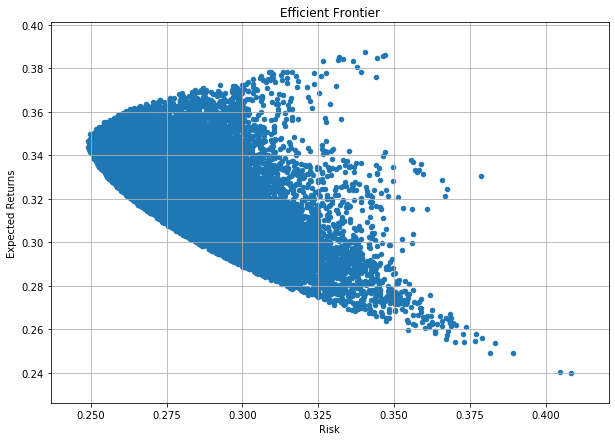

In [13]:
df.plot.scatter(x='Risk', y='Returns', figsize=(10,7), grid=True)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()